# <center><span style="color:#FF7F50"><u> SDA - Projet 3 Text Mining : Suivi du #Ukraine</u><br><br>*Valentina - Anne - Alicia - Julie*</span></center>
***

## <span style="color:#191970"> Objectif :</span>
L’objectif de ce projet est de produire une analyse des tweets en français sur la guerre russo-ukrainienne de 2022.<br><br>
Pour cela : produire une analyse descriptive des tweets collectés et utiliser des modèles de Machine Learning pour essayer de faire émerger les grandes thématiques évoquées et suivre leur évolution.

## <span style="color:#191970">Import des packages</span>

In [1]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 9.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 kB 7.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

  Cloning https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to /tmp/pip-req-build-9g82t14p
  Running command git clone --filter=blob:none --quiet https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git /tmp/pip-req-build-9g82t14p
  Resolved https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to commit bc0ebd0135a6cc78f48ddf184069b4c0b9c017d8
  Preparing metadata (setup.py) ... done
  Created wheel for FrenchLefffLemmatizer: filename=FrenchLefffLemmatizer-0.3-py3-none-any.whl size=3533513 sha256=048302d4bf255c87b9331c0f7de8fc69dabb14e3203b839232433c6c9ac398d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-vdqj8pv4/wheels/98/2a/68/fa037d302c091a60390195bc19da0a9eb835ff105dbee42c7d
Successfully built FrenchLefffLemmatizer
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
path = "C:/Users/vnarv/PycharmProjects/twitter_text_mining/"
os.chdir(path)

In [ ]:
import re
import time
from collections import Counter

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from french_lefff_lemmatizer.french_lefff_lemmatizer import \
    FrenchLefffLemmatizer
from langdetect import DetectorFactory, detect
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from unidecode import unidecode
from wordcloud import WordCloud

from notebooks.utils import (get_tfidf_top_features, get_top_n_words,
                             ngram_top, wordcloud_cols)
from src.model.modelling import *
from src.preprocessing.preprocessing import preprocessing
from src.preprocessing.tools_preprocessing import read_files, transform_dates

In [18]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px
# from wordcloud import WordCloud
# import plotly.graph_objects as go
# import os
# import re
# import nltk
# from nltk.corpus import stopwords
# from langdetect import detect, DetectorFactory
# from unidecode import unidecode
# from nltk.stem import SnowballStemmer
# from sklearn.feature_extraction.text import CountVectorizer
# from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
# from collections import Counter
# import os
# import time

# from src.preprocessing.preprocessing import preprocessing
# from src.preprocessing.tools_preprocessing import (
#     read_files, transform_dates, transform_dates
# )

# from notebooks.utils import (
#     get_top_n_words,
#     ngram_top,
#     wordcloud_cols,
#     get_tfidf_top_features
# )
# from src.model.modelling import *

## <span style="color:#191970">1. Import des données</span>

In [4]:
data = read_files(os.path.join(path, "data/min_retweet_10/"))

C:\Users\vnarv\PycharmProjects\twitter_text_mining


## <span style="color:#191970">2. Analyse exploratoire</span>

### <span style="color:#191970">2.1. Description des données</span>

#### <span style="color:#191970">Types de variables</span>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19939 entries, 0 to 19938
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   datetime       19939 non-null  object
 1   tweet_id       19939 non-null  int64 
 2   text           19939 non-null  object
 3   username       19939 non-null  object
 4   like_count     19939 non-null  int64 
 5   retweet_count  19939 non-null  int64 
 6   reply_count    19939 non-null  int64 
 7   quote_count    19939 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.2+ MB


In [5]:
data.dtypes

datetime         object
tweet_id          int64
text             object
username         object
like_count        int64
retweet_count     int64
reply_count       int64
quote_count       int64
dtype: object

In [6]:
data.head()

datetime             tweet_id  \
0  2022-02-01 08:44:30+00:00  1488433061196812291   
1  2022-02-01 09:42:34+00:00  1488447673883676672   
2  2022-02-01 12:43:38+00:00  1488493240475078658   
3  2022-02-01 13:20:13+00:00  1488502446771081216   
4  2022-02-01 13:56:13+00:00  1488511509961527302   

                                                text         username  \
0  Voilà l'info, malheureusement très peu reprise...        tcabarrus   
1  #Ukraine Face à Poutine ... Macron hausse le t...          lapin47   
2  Crise en #Ukraine : « Emmanuel #Macron et Vlad...  FaireEnsembleEM   
3  La #Russie c'est l'équivalent du PIB de l'Ital...  BrunoRetailleau   
4  Crise en #Ukraine : voilà pourquoi il faut sor...      f_philippot   

   like_count  retweet_count  reply_count  quote_count  
0          58             33            2            0  
1         230            103           36           24  
2          63             17            6            0  
3          59             29            9            1  
4         745            236           34            5

In [7]:
data.tail()

datetime             tweet_id  \
19934  2022-07-01 20:23:10+00:00  1542967067611127813   
19935  2022-07-01 20:10:32+00:00  1542963887175335937   
19936  2022-07-01 20:39:44+00:00  1542971236459888641   
19937  2022-07-01 20:31:01+00:00  1542969041161158656   
19938  2022-07-01 21:21:38+00:00  1542981780092985344   

                                                    text        username  \
19934  C'est magnifique et tellement émouvant 🥰🇺🇦🇪🇺 #...        Anna78__   
19935  👉 Guerre un #Ukraine : que faire pour aider le...             LCI   
19936  👉 Guerre en #Ukraine : le soft power des résea...             LCI   
19937  Implacable. A gauche le peuple d’#Ukraine qui ...     PJakubowicz   
19938  Les urgences d'un hôpital ferment faute de soi...  LeDucDeLaToile   

       like_count  retweet_count  reply_count  quote_count  
19934          57             20            2            2  
19935         136             59          171           28  
19936          54             28           38            4  
19937         948            438          265           25  
19938          19             13            0            1

#### <span style="color:#191970">Recherche de doublons</span>

In [8]:
#nb de doublons
print(f"La base contient {data.duplicated().sum()} doublons.")

La base contient 0 doublons.


#### <span style="color:#191970">Refiltre sur tweets restants en anglais</span>

In [9]:
# lower case tweets
data["text"] = data["text"].str.lower()

# store all hashtags into a column
data["hashtags"] = data["text"].apply(lambda y: [x.group() for x in re.finditer(r'#[a-zA-Z]+', y)])

# Find all @
data["arrobas"] = data["text"].apply(lambda y: [x.group() for x in re.finditer(r'@[a-zA-Z]+', y)])

# replace https links with "link"
regex_http = r'([\w+]+\:\/\/)?([\w\d-]+\.)*[\w-]+[\.\:]\w+([\/\?\=\&\#\.]?[\w-]+)*\/?'

#data["text_clean"] = [re.sub(regex_http, '<link>', doc) for doc in data["text"]]
data["text_clean"] = [re.sub(regex_http, '', doc) for doc in data["text"]]
#en enlevant les accents et emoji : plus de tweets déclarés en anglais à tord => on garde les accents


In [10]:
data.head()

datetime             tweet_id  \
0  2022-02-01 08:44:30+00:00  1488433061196812291   
1  2022-02-01 09:42:34+00:00  1488447673883676672   
2  2022-02-01 12:43:38+00:00  1488493240475078658   
3  2022-02-01 13:20:13+00:00  1488502446771081216   
4  2022-02-01 13:56:13+00:00  1488511509961527302   

                                                text         username  \
0  voilà l'info, malheureusement très peu reprise...        tcabarrus   
1  #ukraine face à poutine ... macron hausse le t...          lapin47   
2  crise en #ukraine : « emmanuel #macron et vlad...  FaireEnsembleEM   
3  la #russie c'est l'équivalent du pib de l'ital...  BrunoRetailleau   
4  crise en #ukraine : voilà pourquoi il faut sor...      f_philippot   

   like_count  retweet_count  reply_count  quote_count  \
0          58             33            2            0   
1         230            103           36           24   
2          63             17            6            0   
3          59             29            9            1   
4         745            236           34            5   

                                            hashtags          arrobas  \
0  [#medias, #emmanuelmacron, #vladimirpoutine, #...               []   
1                                         [#ukraine]               []   
2                      [#ukraine, #macron, #poutine]  [@gabrielattal]   
3                         [#russie, #kiev, #ukraine]               []   
4                                         [#ukraine]               []   

                                          text_clean  
0  voilà l'info, malheureusement très peu reprise...  
1  #ukraine face à poutine ... macron hausse le t...  
2  crise en #ukraine : « emmanuel #macron et vlad...  
3  la #russie c'est l'équivalent du pib de l'ital...  
4  crise en #ukraine : voilà pourquoi il faut sor...

In [11]:
# refiltre sur tweets restants en anglais
tweet_lg = []
for row in data.text_clean :
    tw_lang = detect(row)
    tweet_lg.append(tw_lang)
    
# créatio d'une colonne contenant la langue
data["language"] = tweet_lg

other_lang = data[data["language"] != "fr"]
nb_other_lang = other_lang.groupby("language")["tweet_id"].nunique()
print(f"Nb of tweets detected in other language {nb_other_lang}")
print(other_lang[["text_clean", "language"]].iloc[:10])
        
# Filtrer les tweets en français
is_french = "fr"
data = data[data["language"] == is_french]

# delete accents and emojis
data["text_clean"] = data["text_clean"].apply(lambda x: unidecode(x))
# replace all non alphabetic chars with an space
data["text_clean"] = data["text_clean"].apply(lambda x: re.sub(r"[^a-z]+", " ", x))
# delete empty tweets
data = data[(data["text_clean"] != " ")]
# delete any nan values
data = data[~data["text_clean"].isna()]


Nb of tweets detected in other language language
af     4
ca     1
cs     2
da     1
de    10
en    39
et     5
fi     9
hr     3
id     4
it     9
lt     3
lv     1
nl     4
no     7
pl     1
sk     1
sl     5
sv     1
Name: tweet_id, dtype: int64
                                             text_clean language
192   spanish minister of foreign affairs josé manue...       en
386   #g7 finance ministers´ statement on #ukraine ➡...       nl
1148  ukraine foreign ministry recalls chargé d'affa...       en
1502       explosions in kyiv  via @neilphauer #ukraine       fi
1540                         chaos in kharkov #ukraine        sl
1551                   sirens in #kiev\r\n\r\n#ukraine        sl
1580  #ukrainewar \r\n#russianattack \r\nattaques ma...       en
1741  je poste cela \r\n#ukraine #ukraineconflict #u...       pl
2024  quartier de kharkiv ce matin\r\n#украинская #в...       et
2039  🔴#ukraine: voici la situation à #vychhorod, 20...       fi


In [12]:
data.head()

datetime             tweet_id  \
0  2022-02-01 08:44:30+00:00  1488433061196812291   
1  2022-02-01 09:42:34+00:00  1488447673883676672   
2  2022-02-01 12:43:38+00:00  1488493240475078658   
3  2022-02-01 13:20:13+00:00  1488502446771081216   
4  2022-02-01 13:56:13+00:00  1488511509961527302   

                                                text         username  \
0  voilà l'info, malheureusement très peu reprise...        tcabarrus   
1  #ukraine face à poutine ... macron hausse le t...          lapin47   
2  crise en #ukraine : « emmanuel #macron et vlad...  FaireEnsembleEM   
3  la #russie c'est l'équivalent du pib de l'ital...  BrunoRetailleau   
4  crise en #ukraine : voilà pourquoi il faut sor...      f_philippot   

   like_count  retweet_count  reply_count  quote_count  \
0          58             33            2            0   
1         230            103           36           24   
2          63             17            6            0   
3          59             29            9            1   
4         745            236           34            5   

                                            hashtags          arrobas  \
0  [#medias, #emmanuelmacron, #vladimirpoutine, #...               []   
1                                         [#ukraine]               []   
2                      [#ukraine, #macron, #poutine]  [@gabrielattal]   
3                         [#russie, #kiev, #ukraine]               []   
4                                         [#ukraine]               []   

                                          text_clean language  
0  voila l info malheureusement tres peu reprise ...       fr  
1       ukraine face a poutine macron hausse le ton        fr  
2  crise en ukraine emmanuel macron et vladimir p...       fr  
3  la russie c est l equivalent du pib de l itali...       fr  
4  crise en ukraine voila pourquoi il faut sortir...       fr

### <span style="color:#191970">2.2. Statistiques globales</span>

#### <span style="color:#191970">Evolution nb de tweets</span>

In [13]:
data = transform_dates(df=data, column="datetime")

In [14]:
data['date'].min()

datetime.date(2022, 2, 1)

In [15]:
data['date'].max()

datetime.date(2022, 7, 1)

In [16]:
#evolution nb de tweet par jour 
#tpd=nb tweets per day
tpd = data.groupby("date")["tweet_id"].count().reset_index()
display(tpd)

date  tweet_id
0    2022-02-01        12
1    2022-02-02        12
2    2022-02-03        13
3    2022-02-04        21
4    2022-02-05         7
..          ...       ...
146  2022-06-27        70
147  2022-06-28        58
148  2022-06-29        42
149  2022-06-30        42
150  2022-07-01        51

[151 rows x 2 columns]

In [17]:
#line plot evolution du nb de tweets par jour
fig = px.line(tpd,
              x='date',
              y='tweet_id',
              title='Evolution du nb de tweets par jour', 
              labels={
                     "tweet_id": "Nb de tweets"
                 })
fig.show()

Pic du nombre de tweets sur 5 jours à partir du début de la guerre le 24 février 2021, jusqu'au 1er mars 2021, puis une phase de décroissance significative du nombre de tweets par jour durant un mois, pour se stabiliser sur une moyenne d'une cinquantaine de tweets par jour.

22/02 : Russie reconnaît l'indépendance des territoires séparatistes dans le Donbass (indépendance de la république populaire de Donetsk et de la république populaire de Lougansk)<br>
24/02 : la guerre éclate<br>
27/02 : Russie menace nucléaire / UE envoie des armes à l'Ukraine <br>
09/03 : une maternité bombardée à Marioupol <br>
13/03 : Russie bombarde une base Ukrainienne vers la Pologne <br>
16/03 : Russie exclue du Conseil de l'Europe / Un théâtre abritant "des centaines de civils" visé par une frappe aérienne russe dans le port assiégé de Marioupol / Joe Biden, a qualifié Poutine de "criminel de guerre"<br>
24/03 : changement de stratégie du Kremlin<br>
pics 03-04-05/04 : Fin mars, l’échec de l’offensive russe sur Kiev / démonstration de force de la Russie / les crimes russes découverts à Boutcha<br>
14/04 : le « Moskva » coule<br>
23/04 : retrait des troupes russes<br>
30/05 : embargo officiel sur le pétrole russe<br>
16/06 : Visite des présidents français, allemand et italien<br>

#### <span style="color:#191970">Stats descriptives - variables numériques</span>

In [18]:
count_var = ['like_count','retweet_count','reply_count','quote_count']
data[count_var].describe()

like_count  retweet_count   reply_count   quote_count
count  19829.000000   19829.000000  19829.000000  19829.000000
mean     369.925362      92.327349     25.059862     11.842251
std     1844.063144     304.165692     84.926451     85.000427
min        1.000000       3.000000      0.000000      0.000000
25%       39.000000      20.000000      2.000000      1.000000
50%       72.000000      31.000000      6.000000      2.000000
75%      172.000000      62.000000     17.000000      5.000000
max    76494.000000   15137.000000   3512.000000   6546.000000

En moyenne un tweet est liké 373 fois et peut aller jusqu'à un maximum de 76494 like. <br>
Par ailleurs, un tweet est retweeté 93 fois en moyenne et peut être retweeté au maximum 15137 fois.<br>
Les tweets les plus populaires sont les tweets de "libe", les plus likés et les plus retweetés sont de Mediapart.

In [19]:
data['username'].value_counts()

libe               550
tcabarrus          493
LCI                493
CerfiaFR           428
CedricMas          360
                  ... 
MeSoroJeanCharl      1
JPFarandou           1
JuBrugerolles        1
joursheureux_on      1
bitznarweb           1
Name: username, Length: 4307, dtype: int64

In [20]:
# classement des username qui sont le plus retweetés
# tpu = tweets per user
tpu = data.groupby("username")["tweet_id"].count().reset_index()
tpu = tpu.sort_values(by='tweet_id', ascending=False)

In [21]:
tpu.reset_index(drop=True, inplace=True)

In [22]:
tpu_20 = tpu.iloc[0:20]

In [23]:
#20 premiers usernames qui ont été le plus retweetés 
tpu_20

username  tweet_id
0              libe       550
1               LCI       493
2         tcabarrus       493
3          CerfiaFR       428
4         CedricMas       360
5       France24_fr       296
6       le_Parisien       285
7         Le_Figaro       232
8    CorentinSellin       205
9       francediplo       187
10       Mediavenir       170
11        lemondefr       159
12  andreivaitovich       158
13            afpfr       158
14    bechetgolovko       139
15       stefsiohan       136
16     UkraineStand       136
17          YvesPDB       135
18    ulyssepariser       128
19        LPLdirect       128

In [24]:
#20 premiers "tweeters" sur la période
fig3 = px.bar(tpu_20,
              x='tweet_id',
              y='username',
              orientation='h',
              title='Top 20 des tweets dans le périmètre',
              labels={
                     "tweet_id": "Nb de tweets"
                 }
             )
fig3.show()

Dans les premiers username qui sont le plus retweetés, on retrouve beaucoup de grands journaux/médias tels que Libé, LCI, France24, Le Parisien mais aussi des personalités comme des journalistes tels que Thierry de Cabarrus (tcabarrus) ou encore des historiens comme Cedric Mas ou Corentin Sellin.

#### <span style="color:#191970">Distributions - variables numériques</span>

In [25]:
#Boxplots - Distribution des données
fig = go.Figure()

fig.add_trace(go.Box(x=data["like_count"], name="like_count"))
fig.add_trace(go.Box(x=data["retweet_count"], name="retweet_count"))
fig.update_layout(
    title="Distribution des retweets et des likes dans le périmètre"
)
fig.show()

In [26]:
data[data['like_count']>50000].sort_values(by='retweet_count', ascending=False).head()

datetime             tweet_id  \
16037 2022-04-14 08:46:00+00:00  1514525365158436866   
15907 2022-04-12 11:54:30+00:00  1513848028289019906   
11934 2022-03-14 15:33:55+00:00  1503393999452786690   
3124  2022-02-25 10:16:20+00:00  1497153481525936128   

                                                    text    username  \
16037  🇺🇳 flash - le directeur général de l'#oms esti...  Mediavenir   
15907  🇺🇦 le mot "macroner" est né en #ukraine. défin...  Mediavenir   
11934  🇺🇸🇷🇺 insolite : elon musk défie vladimir #pout...  Mediavenir   
3124   💻🇷🇺 flash - le collectif de hackers #anonymous...  Mediavenir   

       like_count  retweet_count  reply_count  quote_count  \
16037       58690          15137          845         1378   
15907       51724           9649          560         1306   
11934       76494           8731         1196         3022   
3124        69192           7424          685         1178   

                                                hashtags arrobas  \
16037                                   [#oms, #ukraine]      []   
15907                                [#ukraine, #macron]      []   
11934                               [#poutine, #ukraine]      []   
3124   [#anonymous, #russie, #ukraine, #laguerre, #uk...      []   

                                              text_clean language        date  \
16037   flash le directeur general de l oms estime qu...       fr  2022-04-14   
15907   le mot macroner est ne en ukraine definition ...       fr  2022-04-12   
11934   insolite elon musk defie vladimir poutine dan...       fr  2022-03-14   
3124    flash le collectif de hackers anonymous a dec...       fr  2022-02-25   

       day  month      time  hour  minute  
16037   14      4  08:46:00     8      46  
15907   12      4  11:54:30    11      54  
11934   14      3  15:33:55    15      33  
3124    25      2  10:16:20    10      16

In [27]:
data[data['like_count']>50000].sort_values(by='like_count', ascending=False).head()

datetime             tweet_id  \
11934 2022-03-14 15:33:55+00:00  1503393999452786690   
3124  2022-02-25 10:16:20+00:00  1497153481525936128   
16037 2022-04-14 08:46:00+00:00  1514525365158436866   
15907 2022-04-12 11:54:30+00:00  1513848028289019906   

                                                    text    username  \
11934  🇺🇸🇷🇺 insolite : elon musk défie vladimir #pout...  Mediavenir   
3124   💻🇷🇺 flash - le collectif de hackers #anonymous...  Mediavenir   
16037  🇺🇳 flash - le directeur général de l'#oms esti...  Mediavenir   
15907  🇺🇦 le mot "macroner" est né en #ukraine. défin...  Mediavenir   

       like_count  retweet_count  reply_count  quote_count  \
11934       76494           8731         1196         3022   
3124        69192           7424          685         1178   
16037       58690          15137          845         1378   
15907       51724           9649          560         1306   

                                                hashtags arrobas  \
11934                               [#poutine, #ukraine]      []   
3124   [#anonymous, #russie, #ukraine, #laguerre, #uk...      []   
16037                                   [#oms, #ukraine]      []   
15907                                [#ukraine, #macron]      []   

                                              text_clean language        date  \
11934   insolite elon musk defie vladimir poutine dan...       fr  2022-03-14   
3124    flash le collectif de hackers anonymous a dec...       fr  2022-02-25   
16037   flash le directeur general de l oms estime qu...       fr  2022-04-14   
15907   le mot macroner est ne en ukraine definition ...       fr  2022-04-12   

       day  month      time  hour  minute  
11934   14      3  15:33:55    15      33  
3124    25      2  10:16:20    10      16  
16037   14      4  08:46:00     8      46  
15907   12      4  11:54:30    11      54

Les tweets les plus likés, retweetés, quotés et commentés sont les tweets de Mediavenir

#### <span style="color:#191970">Répartition des tweets/tranches de like</span>

In [28]:
tranches_like = [
    (data['like_count'] > 1000) ,
    (data['like_count'] > 200) & (data['like_count'] <= 1000),
    (data['like_count'] > 100) & (data['like_count'] <= 200),
    (data['like_count'] > 50) & (data['like_count'] <= 100),
    (data['like_count'] > 10) & (data['like_count'] <= 50),
    (data['like_count'] > 0) & (data['like_count'] <= 10),
    (data['like_count'] == 0)
]
choicelist = [">1000 likes", "[201-1000 likes]", "[101-200 likes]", "[51-100 likes]", "[11-50 likes]", "[1-10 likes]", "0 like"]
data['tranches_like'] = np.select(tranches_like, choicelist, default='Not Specified')

In [29]:
data.head()

datetime             tweet_id  \
0 2022-02-01 08:44:30+00:00  1488433061196812291   
1 2022-02-01 09:42:34+00:00  1488447673883676672   
2 2022-02-01 12:43:38+00:00  1488493240475078658   
3 2022-02-01 13:20:13+00:00  1488502446771081216   
4 2022-02-01 13:56:13+00:00  1488511509961527302   

                                                text         username  \
0  voilà l'info, malheureusement très peu reprise...        tcabarrus   
1  #ukraine face à poutine ... macron hausse le t...          lapin47   
2  crise en #ukraine : « emmanuel #macron et vlad...  FaireEnsembleEM   
3  la #russie c'est l'équivalent du pib de l'ital...  BrunoRetailleau   
4  crise en #ukraine : voilà pourquoi il faut sor...      f_philippot   

   like_count  retweet_count  reply_count  quote_count  \
0          58             33            2            0   
1         230            103           36           24   
2          63             17            6            0   
3          59             29            9            1   
4         745            236           34            5   

                                            hashtags          arrobas  \
0  [#medias, #emmanuelmacron, #vladimirpoutine, #...               []   
1                                         [#ukraine]               []   
2                      [#ukraine, #macron, #poutine]  [@gabrielattal]   
3                         [#russie, #kiev, #ukraine]               []   
4                                         [#ukraine]               []   

                                          text_clean language        date  \
0  voila l info malheureusement tres peu reprise ...       fr  2022-02-01   
1       ukraine face a poutine macron hausse le ton        fr  2022-02-01   
2  crise en ukraine emmanuel macron et vladimir p...       fr  2022-02-01   
3  la russie c est l equivalent du pib de l itali...       fr  2022-02-01   
4  crise en ukraine voila pourquoi il faut sortir...       fr  2022-02-01   

   day  month      time  hour  minute     tranches_like  
0    1      2  08:44:30     8      44    [51-100 likes]  
1    1      2  09:42:34     9      42  [201-1000 likes]  
2    1      2  12:43:38    12      43    [51-100 likes]  
3    1      2  13:20:13    13      20    [51-100 likes]  
4    1      2  13:56:13    13      56  [201-1000 likes]

In [30]:
data.to_csv('./df_fr.csv', index=False)

In [31]:
data['tranches_like'].value_counts(normalize=True)

[11-50 likes]       0.347521
[51-100 likes]      0.256947
[201-1000 likes]    0.166726
[101-200 likes]     0.163649
>1000 likes         0.055222
[1-10 likes]        0.009935
Name: tranches_like, dtype: float64

In [32]:
#Histogramme de répartition des tweets par tranche de like
data = data.sort_values("like_count", ascending=True)
fig = px.histogram(data, x="tranches_like",
                   title="Histogramme de répartition des tweets par tranche de like",
                   labels={
                     "count": "Nb de tweets"
                 })
fig.show()

La plupart des tweets sont likés entre 11 et 100 fois (un tiers des tweets de la base) et 25% entre 50 et 100 fois.<br>
Très peu de tweets sont likés plus de 1000 fois : 6%.

#### <span style="color:#191970">Nuages de mots</span>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vnarv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


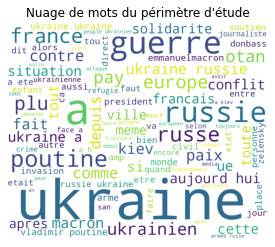

In [35]:
#Nuage de mots - tous tweets
nltk.download('stopwords')
stopwords_set = set(stopwords.words('french')) 
wordcloud = WordCloud(background_color='white',
                           collocations=True, # Inclu les bigrammes
                           width=1200,
                           height=1000,
                           max_words=100,
                           stopwords=stopwords_set).generate(" ".join(data['text_clean']))

plt.title("Nuage de mots du périmètre d'étude")
plt.axis("off")
plt.imshow(wordcloud)
plt.savefig("wordcloud_general.png")

On peut voir des mots évoquant le soutien des autres Nations à l'Ukraine avec notamment : "paix", "soutien", "Europe", "France", "monde", "Otan", "sanction". <br>
On peut également voir des noms de villes qui ont fait l'actualité, ressortir et notamment "Khiev", "Donbass", "Kyiv" ou "Marioupol". <br>
On peut aussi voir des mots comme "crime", "mort", "militaire" ou "bombardement" qui témoignent de la situation de guerre.

# Nuage de mots par mois 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vnarv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


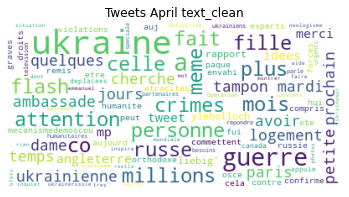

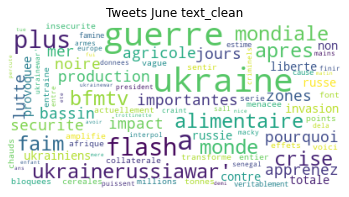

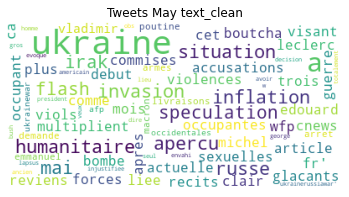

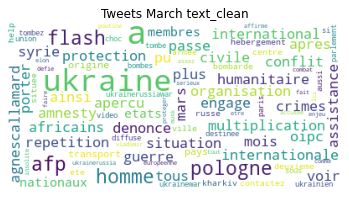

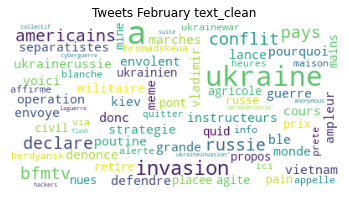

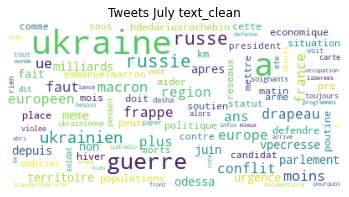

In [36]:
# nuage de mots par mois 
wordcloud_cols('month', 'text_clean', data )

# Nuage de mots - hashtags présents dans les tweets

In [38]:
data['hashtags']

16005                                           [#ukraine]
18745                                           [#ukraine]
19796                                           [#ukraine]
17592                                           [#ukraine]
16003                                       [#m, #ukraine]
                               ...                        
267                  [#russie, #ukraine, #ukraineinvasion]
15907                                  [#ukraine, #macron]
16037                                     [#oms, #ukraine]
3124     [#anonymous, #russie, #ukraine, #laguerre, #uk...
11934                                 [#poutine, #ukraine]
Name: hashtags, Length: 19829, dtype: object

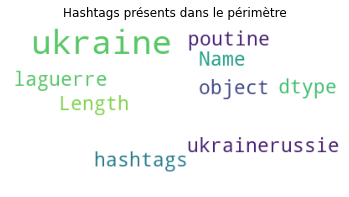

In [39]:
wordcloud_hash = WordCloud(background_color='white',
                          stopwords=stopwords_set,
                          max_words=100,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(data['hashtags'].explode()))

plt.title('Hashtags présents dans le périmètre')
plt.axis('off')
plt.imshow(wordcloud_hash)
plt.savefig("wordcloud_hashtags.png")

### <span style="color:#191970">2.3. Monitorer l'évolution du #Ukraine </span>

In [41]:
# on utilise "text" au lieu de "text_clean" pour trouver les #
data["Occurrence #Ukraine"] = data["text"].apply(
        lambda y: len([x.group() for x in re.finditer(r"#ukraine+", y)])
    )

In [42]:
temp = data.groupby("date")["Occurrence #Ukraine"].sum().reset_index()
temp

date  Occurrence #Ukraine
0    2022-02-01                   12
1    2022-02-02                   13
2    2022-02-03                   13
3    2022-02-04                   22
4    2022-02-05                    7
..          ...                  ...
146  2022-06-27                   77
147  2022-06-28                   60
148  2022-06-29                   42
149  2022-06-30                   43
150  2022-07-01                   53

[151 rows x 2 columns]

In [43]:
fig = px.line(temp,
              x='date',
              y="Occurrence #Ukraine",
              markers="True",
              title="Ocurrence #Ukraine",
              labels={
                     "Occurrence #Ukraine": "Ocurrence"
                 }
             ) 
fig.show()

## Ocurrence des mots clées telles que Marioupol, Crimée, Kiev...

In [44]:
table = data.copy(deep=True)

val = ['marioupol', 'crimee', 'kiev', 'louhansk', 'kramatorsk', 'lviv', 'kherson']

for elem in val:
    table[elem] = table["text_clean"].apply(
        lambda y: len([x.group() for x in re.finditer(f"{elem}+", y)])
    )

table[val].sum()

marioupol      465
crimee         106
kiev          1228
louhansk        22
kramatorsk      72
lviv           142
kherson        114
dtype: int64

In [45]:
tab2 = table.groupby("date")[val + ['Occurrence #Ukraine']].sum().reset_index()
tab2

date  marioupol  crimee  kiev  louhansk  kramatorsk  lviv  kherson  \
0    2022-02-01          0       0     2         0           0     0        0   
1    2022-02-02          0       0     0         0           0     0        0   
2    2022-02-03          0       1     1         0           0     0        0   
3    2022-02-04          0       0     2         0           0     0        0   
4    2022-02-05          0       0     0         0           0     0        0   
..          ...        ...     ...   ...       ...         ...   ...      ...   
146  2022-06-27          0       0     3         0           1     0        0   
147  2022-06-28          1       0     3         0           0     0        0   
148  2022-06-29          0       0     2         0           1     0        1   
149  2022-06-30          0       0     2         0           0     0        0   
150  2022-07-01          0       0     2         0           0     0        1   

     Occurrence #Ukraine  
0                     12  
1                     13  
2                     13  
3                     22  
4                      7  
..                   ...  
146                   77  
147                   60  
148                   42  
149                   43  
150                   53  

[151 rows x 9 columns]

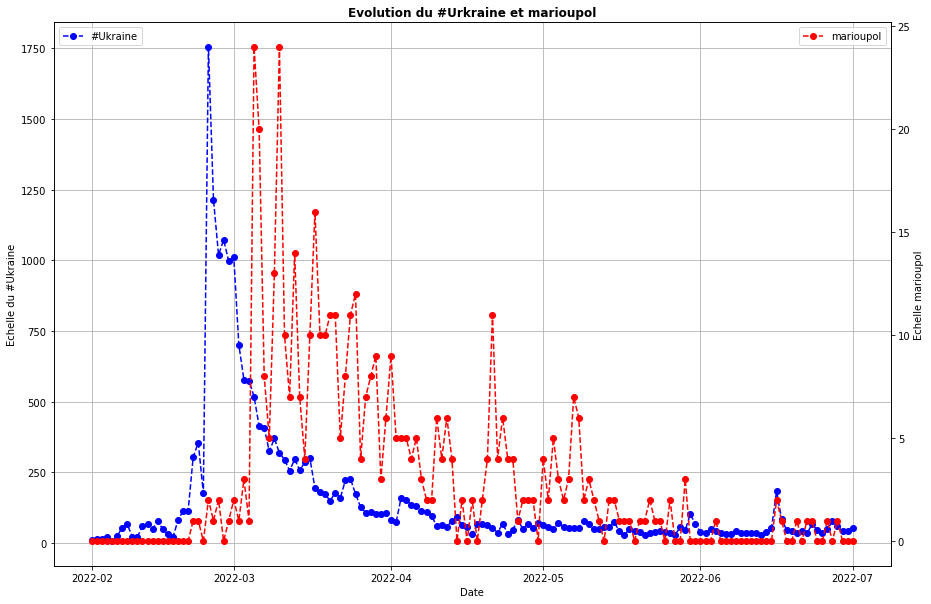

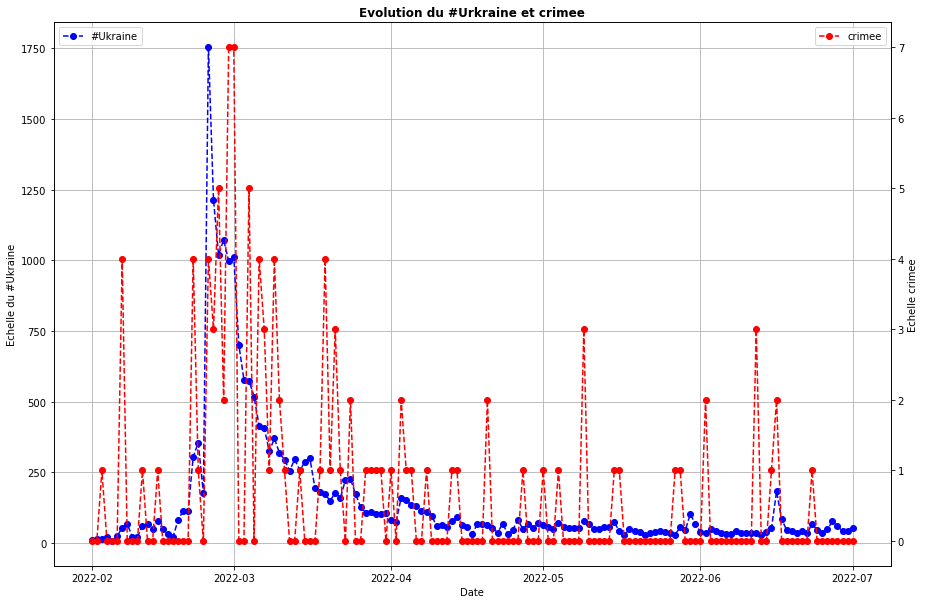

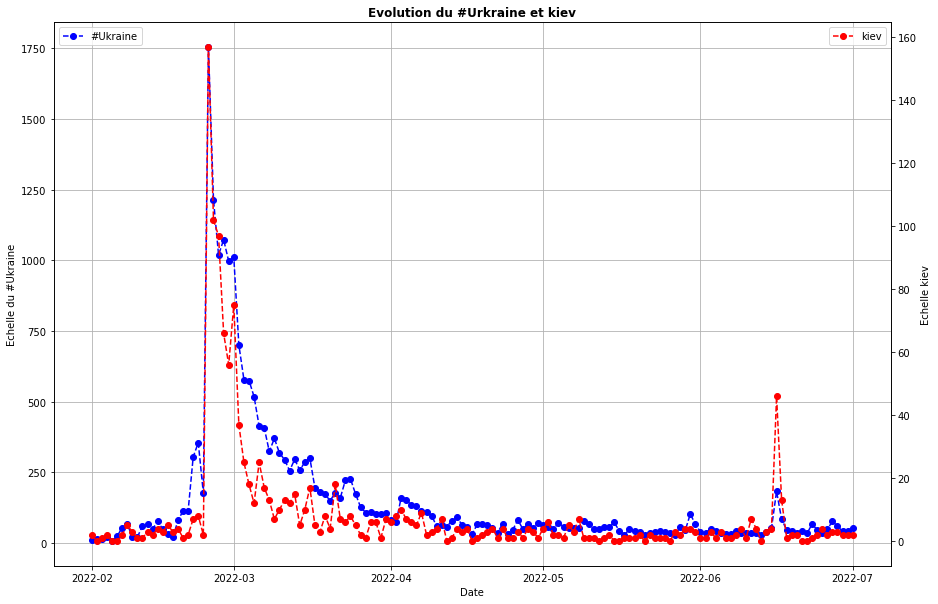

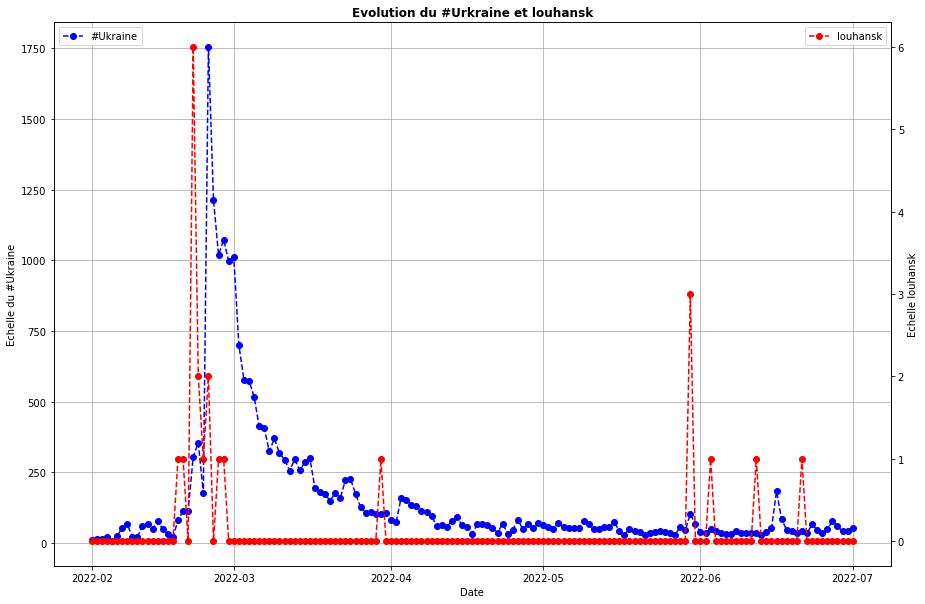

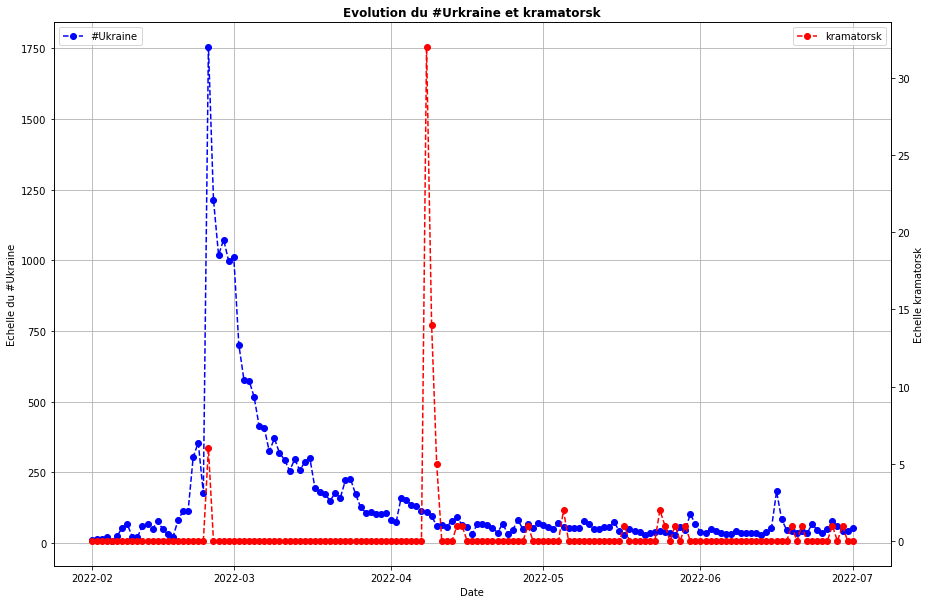

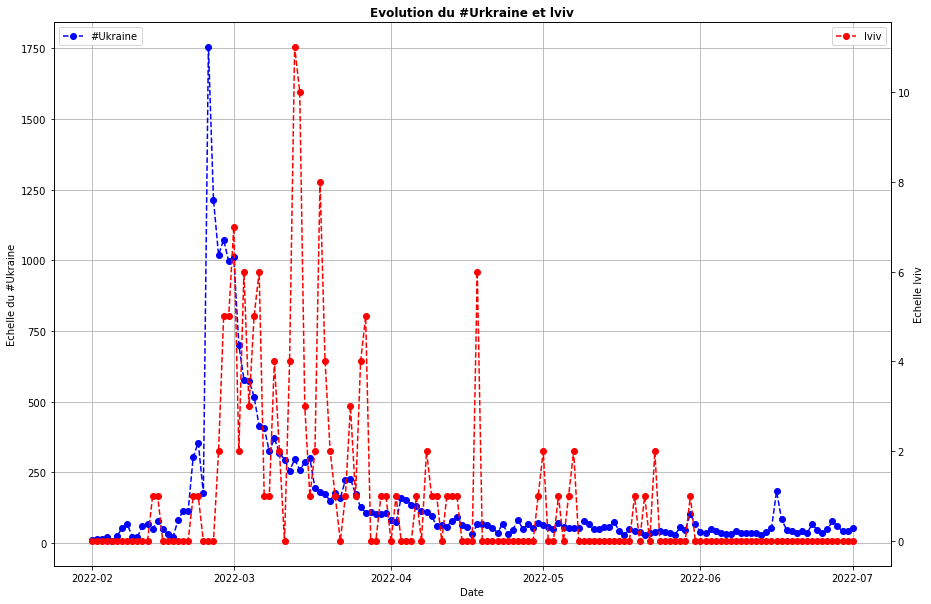

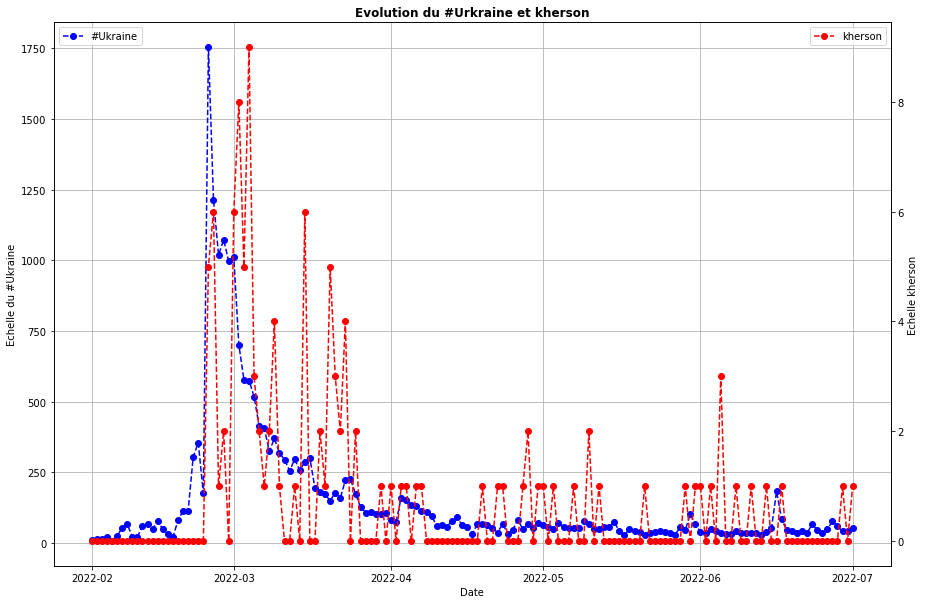

In [46]:
for elem in val:
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    ax.plot(tab2['date'], tab2['Occurrence #Ukraine'], color = 'blue', linestyle='dashed', marker = 'o', label='#Ukraine')
    ax2 = ax.twinx()
    ax2.plot(tab2['date'], tab2[elem], color = 'red', linestyle='dashed', marker = 'o', label=elem)
    plt.title('Evolution du #Urkraine et '+elem, fontweight="bold")
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax.grid()
    ax.set_xlabel("Date")
    ax.set_ylabel(r"Echelle du #Ukraine")
    ax2.set_ylabel(r"Echelle "+elem)
    plt.show()

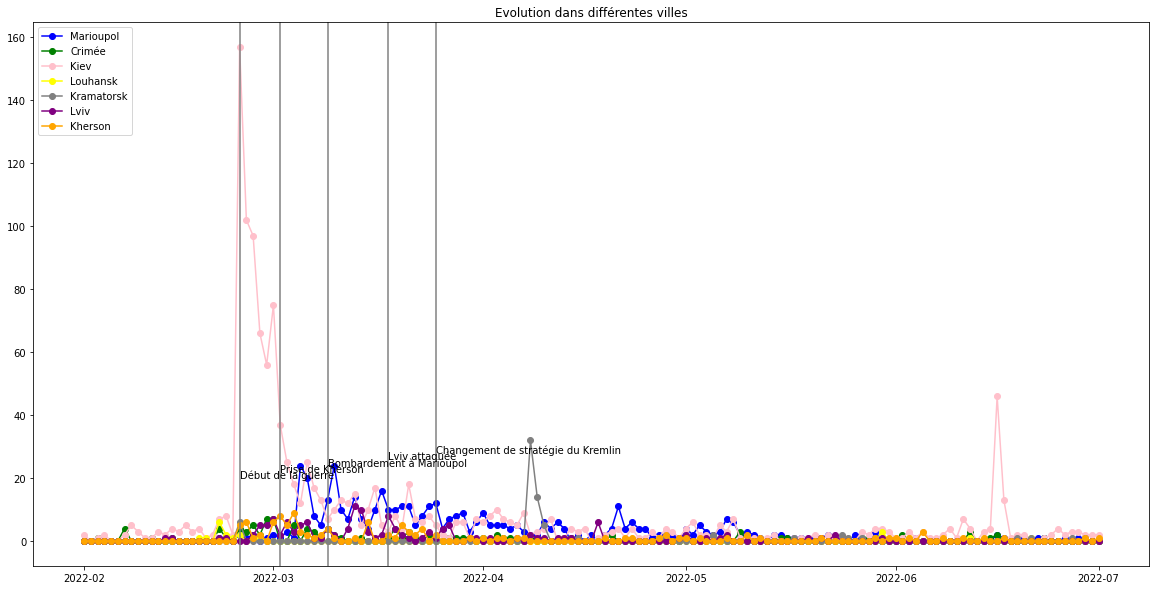

In [47]:
import datetime as dt
plt.figure(figsize=(20,10))

plt.plot(tab2['date'], tab2['marioupol'], color = 'blue', marker='o', label = 'Marioupol');
plt.plot(tab2['date'], tab2['crimee'], color = 'green', marker='o', label = 'Crimée');
plt.plot(tab2['date'], tab2['kiev'], color = 'pink', marker='o', label = 'Kiev');
plt.plot(tab2['date'], tab2['louhansk'], color = 'yellow', marker='o', label = 'Louhansk');
plt.plot(tab2['date'], tab2['kramatorsk'], color = 'gray', marker='o', label = 'Kramatorsk');
plt.plot(tab2['date'], tab2['lviv'], color = 'purple', marker='o', label = 'Lviv');
plt.plot(tab2['date'], tab2['kherson'], color = 'orange', marker='o', label = 'Kherson');

plt.title('Evolution dans différentes villes')
plt.axvline(dt.datetime(2022, 2, 24), color = 'gray')
plt.text(dt.datetime(2022, 2, 24), 20, 'Début de la guerre')

plt.axvline(dt.datetime(2022, 3, 2), color = 'gray')
plt.text(dt.datetime(2022, 3, 2), 22, 'Prise de Kherson')

plt.axvline(dt.datetime(2022, 3, 9), color = 'gray')
plt.text(dt.datetime(2022, 3, 9), 24, 'Bombardement à Marioupol')

plt.axvline(dt.datetime(2022, 3, 18), color = 'gray')
plt.text(dt.datetime(2022, 3, 18), 26, 'Lviv attaquée')

plt.axvline(dt.datetime(2022, 3, 25), color = 'gray')
plt.text(dt.datetime(2022, 3, 25), 28, 'Changement de stratégie du Kremlin')

plt.legend(loc = 'upper left')
plt.show()

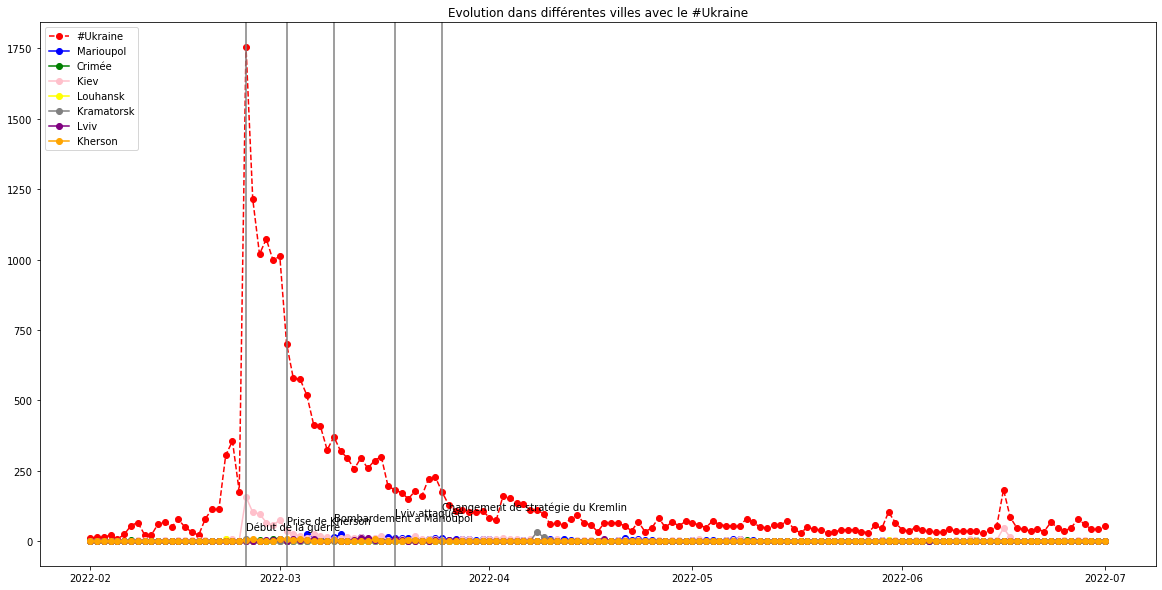

In [48]:
plt.figure(figsize=(20,10))

plt.plot(tab2['date'], tab2['Occurrence #Ukraine'], color = 'red', linestyle='dashed', marker='o', label = '#Ukraine');
plt.plot(tab2['date'], tab2['marioupol'], color = 'blue', marker='o', label = 'Marioupol');
plt.plot(tab2['date'], tab2['crimee'], color = 'green', marker='o', label = 'Crimée');
plt.plot(tab2['date'], tab2['kiev'], color = 'pink', marker='o', label = 'Kiev');
plt.plot(tab2['date'], tab2['louhansk'], color = 'yellow', marker='o', label = 'Louhansk');
plt.plot(tab2['date'], tab2['kramatorsk'], color = 'gray', marker='o', label = 'Kramatorsk');
plt.plot(tab2['date'], tab2['lviv'], color = 'purple', marker='o', label = 'Lviv');
plt.plot(tab2['date'], tab2['kherson'], color = 'orange', marker='o', label = 'Kherson');

plt.title('Evolution dans différentes villes avec le #Ukraine')

plt.axvline(dt.datetime(2022, 2, 24), color = 'gray')
plt.text(dt.datetime(2022, 2, 24), 40, 'Début de la guerre')

plt.axvline(dt.datetime(2022, 3, 2), color = 'gray')
plt.text(dt.datetime(2022, 3, 2), 60, 'Prise de Kherson')

plt.axvline(dt.datetime(2022, 3, 9), color = 'gray')
plt.text(dt.datetime(2022, 3, 9), 70, 'Bombardement à Marioupol')

plt.axvline(dt.datetime(2022, 3, 18), color = 'gray')
plt.text(dt.datetime(2022, 3, 18), 90, 'Lviv attaquée')

plt.axvline(dt.datetime(2022, 3, 25), color = 'gray')
plt.text(dt.datetime(2022, 3, 25), 110, 'Changement de stratégie du Kremlin')

plt.legend(loc = 'upper left')
plt.show()

### <span style="color:#191970">Autres hashtags présents dans les tweets</span>

In [49]:
# Hastags
data['hashtags_pertw'] = data["hashtags"].apply(lambda x: len(x))
hashtags_list = data.hashtags.explode()
hashtags_list.value_counts()

#ukraine                   20070
#russie                     3431
#poutine                    2012
#macron                     1070
#zelensky                    658
                           ...  
#litt                          1
#sylviekauffmann               1
#quisensouviendra              1
#lajeunessecestpecresse        1
#langues                       1
Name: hashtags, Length: 4562, dtype: int64

In [50]:
hts = hashtags_list.value_counts().reset_index().iloc[:20]
hts

fig_autres_htg = px.bar(hts,
              x='hashtags',
              y='index',
              orientation='h',
              title='Top 20 des hashtags',
              labels={
                     "index": "",
                     "hashtags": ""
                 }
             )
fig_autres_htg.show()

### <span style="color:#191970">2.4. Statistiques des comptes officiels du Gouvernement</span>

#### <span style="color:#191970">Evolution nb de tweets</span>

In [51]:
comptes_gouv = ["Interieur_Gouv", "PoliceNationale", "Gendarmerie", "SecCivileFrance", "Prefpolice", "PorteParoleMI", "gouvernementFR"]

In [52]:
df_gouv = data[data['username'].isin(comptes_gouv)]

Peu de tweets présents dans le périmètre (34)

In [53]:
df_gouv.shape

(34, 21)

In [54]:
df_gouv.reset_index(inplace=True, drop=True)

In [55]:
df_gouv.tail()

datetime             tweet_id  \
29 2022-03-22 11:38:25+00:00  1506233836132261893   
30 2022-03-23 17:06:43+00:00  1506678841103863808   
31 2022-03-27 11:17:46+00:00  1508040576628928519   
32 2022-03-08 17:31:04+00:00  1501249151761268739   
33 2022-03-26 20:08:31+00:00  1507811758202929154   

                                                 text         username  \
29  solidarité avec l’#ukraine 🇺🇦🤝🇫🇷\r\ndépart dem...  SecCivileFrance   
30  #solidarité #ukraine 🇺🇦🤝🇫🇷 le convoi à destina...  SecCivileFrance   
31  #solidarité 🇺🇦🤝🇫🇷 départ ce matin pour l’#ukra...  SecCivileFrance   
32  [#ukraine] pensées fraternelles et solidaires ...  PoliceNationale   
33  #solidarité #ukraine🇺🇦🤝🇫🇷 après 2 200 kilomètr...  SecCivileFrance   

    like_count  retweet_count  reply_count  quote_count  \
29         448            144           14           16   
30         494            119            7            8   
31         504            108            7            8   
32         609             90           68            4   
33        1241            333           29           26   

                             hashtags    arrobas  ... language        date  \
29                         [#ukraine]         []  ...       fr  2022-03-22   
30             [#solidarit, #ukraine]         []  ...       fr  2022-03-23   
31             [#solidarit, #ukraine]  [@cdcmae]  ...       fr  2022-03-27   
32                         [#ukraine]         []  ...       fr  2022-03-08   
33  [#solidarit, #ukraine, #roumanie]         []  ...       fr  2022-03-26   

   day  month      time hour  minute     tranches_like Occurrence #Ukraine  \
29  22      3  11:38:25   11      38  [201-1000 likes]                   1   
30  23      3  17:06:43   17       6  [201-1000 likes]                   1   
31  27      3  11:17:46   11      17  [201-1000 likes]                   1   
32   8      3  17:31:04   17      31  [201-1000 likes]                   1   
33  26      3  20:08:31   20       8       >1000 likes                   1   

    hashtags_pertw  
29               1  
30               2  
31               2  
32               1  
33               3  

[5 rows x 21 columns]

In [56]:
df_gouv.tail()

datetime             tweet_id  \
29 2022-03-22 11:38:25+00:00  1506233836132261893   
30 2022-03-23 17:06:43+00:00  1506678841103863808   
31 2022-03-27 11:17:46+00:00  1508040576628928519   
32 2022-03-08 17:31:04+00:00  1501249151761268739   
33 2022-03-26 20:08:31+00:00  1507811758202929154   

                                                 text         username  \
29  solidarité avec l’#ukraine 🇺🇦🤝🇫🇷\r\ndépart dem...  SecCivileFrance   
30  #solidarité #ukraine 🇺🇦🤝🇫🇷 le convoi à destina...  SecCivileFrance   
31  #solidarité 🇺🇦🤝🇫🇷 départ ce matin pour l’#ukra...  SecCivileFrance   
32  [#ukraine] pensées fraternelles et solidaires ...  PoliceNationale   
33  #solidarité #ukraine🇺🇦🤝🇫🇷 après 2 200 kilomètr...  SecCivileFrance   

    like_count  retweet_count  reply_count  quote_count  \
29         448            144           14           16   
30         494            119            7            8   
31         504            108            7            8   
32         609             90           68            4   
33        1241            333           29           26   

                             hashtags    arrobas  ... language        date  \
29                         [#ukraine]         []  ...       fr  2022-03-22   
30             [#solidarit, #ukraine]         []  ...       fr  2022-03-23   
31             [#solidarit, #ukraine]  [@cdcmae]  ...       fr  2022-03-27   
32                         [#ukraine]         []  ...       fr  2022-03-08   
33  [#solidarit, #ukraine, #roumanie]         []  ...       fr  2022-03-26   

   day  month      time hour  minute     tranches_like Occurrence #Ukraine  \
29  22      3  11:38:25   11      38  [201-1000 likes]                   1   
30  23      3  17:06:43   17       6  [201-1000 likes]                   1   
31  27      3  11:17:46   11      17  [201-1000 likes]                   1   
32   8      3  17:31:04   17      31  [201-1000 likes]                   1   
33  26      3  20:08:31   20       8       >1000 likes                   1   

    hashtags_pertw  
29               1  
30               2  
31               2  
32               1  
33               3  

[5 rows x 21 columns]

In [57]:
#evolution nb de tweets par jour du Gouvernement (qui ont été retweetés au moins 10 fois)

#tpd=nb tweets per day
tpd_gouv = df_gouv.groupby("date")["tweet_id"].count().reset_index()
tpd_gouv.sort_values(by="tweet_id", ascending=False)

date  tweet_id
2   2022-02-27         2
3   2022-03-01         2
7   2022-03-08         2
12  2022-03-22         2
18  2022-04-14         2
14  2022-03-24         2
17  2022-03-30         2
0   2022-02-24         1
16  2022-03-27         1
25  2022-06-20         1
24  2022-06-07         1
23  2022-05-21         1
22  2022-05-13         1
21  2022-05-10         1
20  2022-04-21         1
19  2022-04-19         1
13  2022-03-23         1
15  2022-03-26         1
1   2022-02-25         1
11  2022-03-17         1
10  2022-03-16         1
9   2022-03-14         1
8   2022-03-10         1
6   2022-03-04         1
5   2022-03-03         1
4   2022-03-02         1
26  2022-06-23         1

In [58]:
#evolution du nb de tweets par jour du Gouvernement
fig = px.line(tpd_gouv,
              x="date",
              y="tweet_id",
              title='Evolution du nb de tweets par jour du Gouvernement',
              labels={
                     "tweet_id": "Nb de tweets"
                 }
             )
fig.show()

Peu de tweets officiels (retweetés au moins 10 fois) par jour : entre 1 et 2 par jour.

27/02 : Russie menace nucléaire / UE envoie des armes à l'Ukraine <br>
01/03 : Convoi militaire de la Russie vers Kiev <br>
08/03 : Chine encourage cessez le feu / sanctions augmentent<br>
22/03 : Les Etats-Unis et l'Europe vont infliger de nouvelles sanctions à la Russie <br>
24/03 : changement de stratégie du Kremlin<br>
30/03 : "régime de silence", soit un cessez-le-feu local, dans le port assiégé de Marioupol. Cette mesure doit permettre d'ouvrir un couloir humanitaire<br>
14/04 : le « Moskva » coule<br>


#### <span style="color:#191970">Stats describe - variables num</span>

In [59]:
df_gouv[count_var].describe()

like_count  retweet_count  reply_count  quote_count
count    34.000000      34.000000    34.000000    34.000000
mean    217.500000      63.764706    35.764706     4.882353
std     233.622364      58.182606    66.920151     5.197696
min      32.000000      14.000000     0.000000     0.000000
25%      71.000000      30.000000     4.250000     2.000000
50%     143.000000      50.000000     8.000000     3.500000
75%     258.750000      76.000000    24.500000     6.000000
max    1241.000000     333.000000   311.000000    26.000000

En moyenne un tweet du Gouvernement est liké 217 fois et peut aller jusqu'à un maximum de 1241 likes. <br>
Par ailleurs, un tweet est retweeté 64 fois en moyenne et peut être retweeté au maximum jusqu'à 333 fois.<br>

#### <span style="color:#191970">Distributions - variables num</span>

Text(0.5, 0.98, 'Statistiques de base des tweets du Gouvernement')

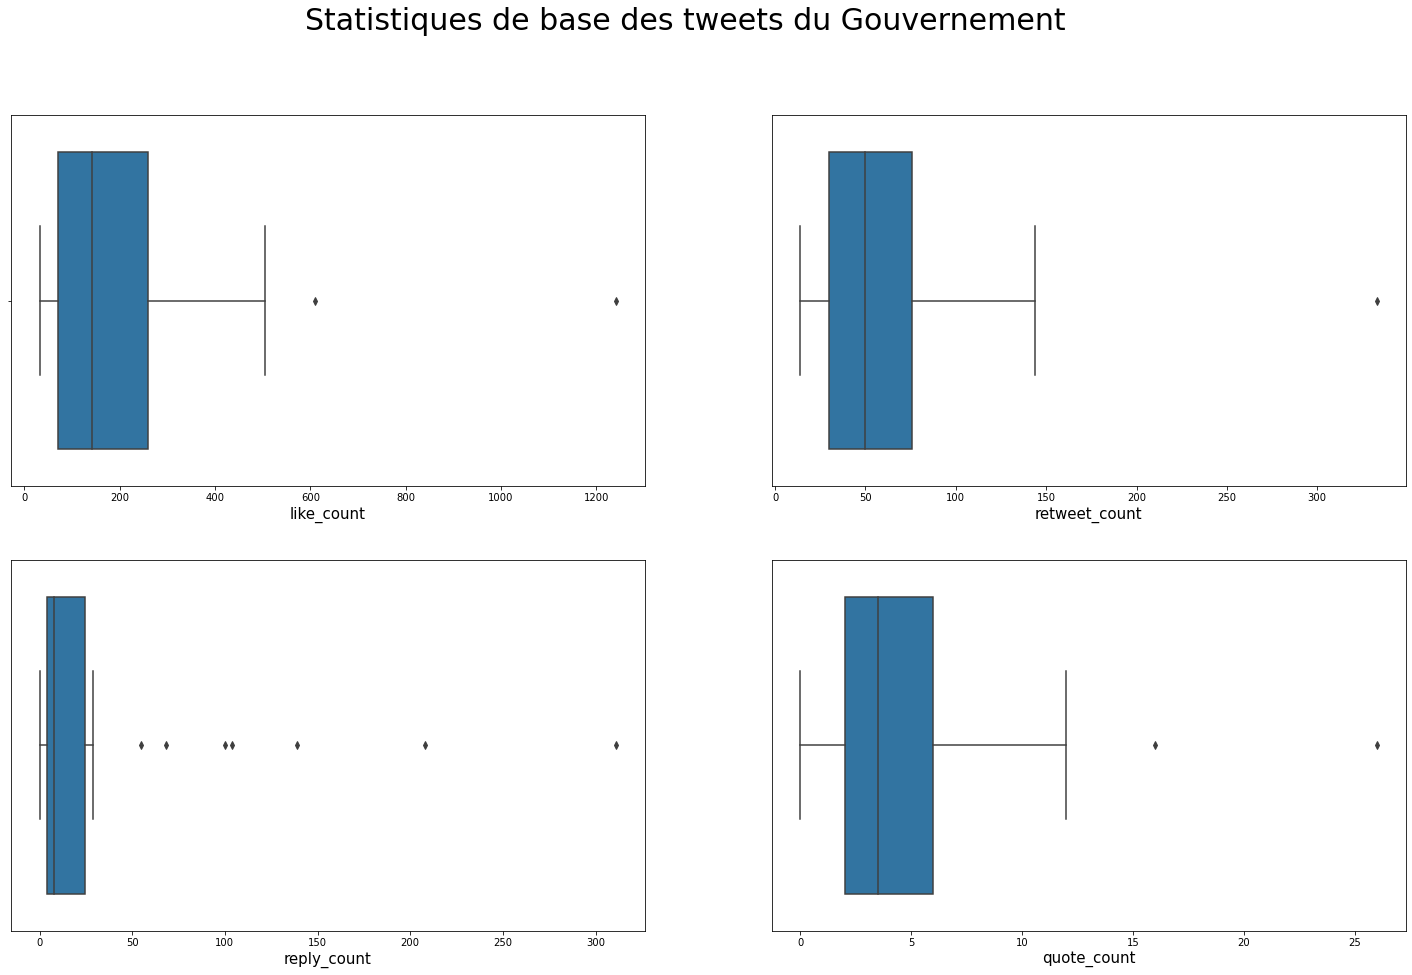

In [60]:
#Boxplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 15))

ax1 = sns.boxplot(x="like_count", data=df_gouv, ax=axes[0,0])
ax2 = sns.boxplot(x="retweet_count", data=df_gouv, ax=axes[0,1])
ax3 = sns.boxplot(x="reply_count", data=df_gouv, ax=axes[1,0])
ax4 = sns.boxplot(x="quote_count", data=df_gouv, ax=axes[1,1])

ax1.set_ylabel('', fontsize=15)
ax1.set_xlabel('like_count', fontsize=15)

ax2.set_ylabel('', fontsize=15)
ax2.yaxis.set_visible(False)
ax2.set_xlabel('retweet_count', fontsize=15)

ax3.set_ylabel('', fontsize=15)
ax3.yaxis.set_visible(False)
ax3.set_xlabel('reply_count', fontsize=15)

ax4.set_ylabel('', fontsize=15)
ax4.yaxis.set_visible(False)
ax4.set_xlabel('quote_count', fontsize=15)
fig.suptitle('Statistiques de base des tweets du Gouvernement', fontsize=30)

In [61]:
df_gouv[df_gouv['like_count']>600].head()

datetime             tweet_id  \
32 2022-03-08 17:31:04+00:00  1501249151761268739   
33 2022-03-26 20:08:31+00:00  1507811758202929154   

                                                 text         username  \
32  [#ukraine] pensées fraternelles et solidaires ...  PoliceNationale   
33  #solidarité #ukraine🇺🇦🤝🇫🇷 après 2 200 kilomètr...  SecCivileFrance   

    like_count  retweet_count  reply_count  quote_count  \
32         609             90           68            4   
33        1241            333           29           26   

                             hashtags arrobas  ... language        date day  \
32                         [#ukraine]      []  ...       fr  2022-03-08   8   
33  [#solidarit, #ukraine, #roumanie]      []  ...       fr  2022-03-26  26   

    month      time hour  minute     tranches_like Occurrence #Ukraine  \
32      3  17:31:04   17      31  [201-1000 likes]                   1   
33      3  20:08:31   20       8       >1000 likes                   1   

    hashtags_pertw  
32               1  
33               3  

[2 rows x 21 columns]

In [62]:
df_gouv[df_gouv['retweet_count']>300].head()

datetime             tweet_id  \
33 2022-03-26 20:08:31+00:00  1507811758202929154   

                                                 text         username  \
33  #solidarité #ukraine🇺🇦🤝🇫🇷 après 2 200 kilomètr...  SecCivileFrance   

    like_count  retweet_count  reply_count  quote_count  \
33        1241            333           29           26   

                             hashtags arrobas  ... language        date day  \
33  [#solidarit, #ukraine, #roumanie]      []  ...       fr  2022-03-26  26   

    month      time hour  minute  tranches_like Occurrence #Ukraine  \
33      3  20:08:31   20       8    >1000 likes                   1   

    hashtags_pertw  
33               3  

[1 rows x 21 columns]

Les tweets les plus populaires en termes de like et retweet sont ceux qui parlent de solidarité

#### <span style="color:#191970">Répartition des tweets/tranches de like</span>

In [63]:
tranches_like_gouv = [
    (df_gouv['like_count'] > 500) ,
    (df_gouv['like_count'] > 200) & (df_gouv['like_count'] <=500),
    (df_gouv['like_count'] > 100) & (df_gouv['like_count'] <=200),
    (df_gouv['like_count'] > 0) & (df_gouv['like_count'] <=100),
    (df_gouv['like_count'] == 0)]
choicelist_gouv = [">500 likes", "[201-500 likes]", "[101-200 likes]", "[1-100 likes]", "0 like"]
df_gouv['tranches_like'] = np.select(tranches_like_gouv, choicelist_gouv, default='Not Specified')
df_gouv = df_gouv.sort_values(by=["like_count"], ascending=True)

C:\Users\vnarv\AppData\Local\Temp\ipykernel_16720\4247361917.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
tmp = df_gouv["tranches_like"].value_counts().sort_values(ascending=False).reset_index()
tmp

index  tranches_like
0    [1-100 likes]             13
1  [201-500 likes]             10
2  [101-200 likes]              8
3       >500 likes              3

In [65]:
#Histogramme de répartition des tweets du Gouvernement par tranche de like
fig = px.bar(tmp,
             x="tranches_like",
             y="index",
            title="Répartition des tweets du Gouvernement par tranche de like",
            labels={
                     "index": "",
                     "tranches_like": "Nb de tweets"
                 })
fig.show()

#### <span style="color:#191970">Nuages de mots</span>

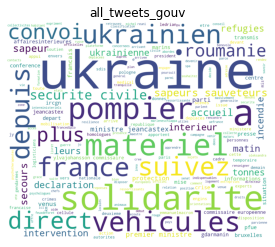

In [66]:
stopwords_set = set(stopwords.words('french')) #nltk
    
wordcloud_gouv = WordCloud(background_color='white',
                           collocations=True, # Inclu les bigrammes -> Deux mots cotes à cotes, même couleur même taille
                           width=1200,
                           height=1000,
                           stopwords=stopwords_set).generate(" ".join(df_gouv['text_clean']))

plt.axis('off')
plt.title('all_tweets_gouv')
plt.imshow(wordcloud_gouv)
plt.savefig("wordcloud_general_gouv.png")

Mots importants : Solidarité, réfugiés, sécurité civile, matériel, Roumanie, pompier, sapeurs sauveteurs, véhicules, convoi, secours, Affaires intérieures

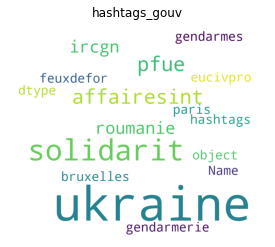

In [75]:
gouv_hash = WordCloud(background_color='white',
                           collocations=True, # Inclu les bigrammes 
                           width=1200,
                           height=1000,
                           stopwords=stopwords_set).generate(str(df_gouv['hashtags'].explode()))

plt.axis('off')
plt.title('hashtags_gouv')
plt.imshow(gouv_hash)
plt.savefig("wordcloud_hashtags_gouv.png")

Mots importants : Solidarité, Roumanie, Affaires intérieures, Gendarmerie, PFUE<br>
C'est vraiment la solidarité qui ressort des tweets du Gouvernement. Entre les tweets les plus populaires qui parlent de solidarité et les nuages de mots qui font ressortir à chaque fois ce terme de Solidarité.

#### <span style="color:#191970">Evolution du nb de Hashtag SOLIDARITE</span>

In [76]:
df_gouv["hash_solidarite"] = df_gouv["text"].apply(
        lambda y: len([x.group() for x in re.finditer(r"#solidar+", y)])
    )

In [77]:
df_gouv.to_csv('./df_gouv.csv', index=False)

In [78]:
df_gouv[["hashtags","text", "hash_solidarite"]].tail(9)

hashtags  \
25                                    [#ukraine]   
26                                    [#ukraine]   
27                            [#ukraine, #ircgn]   
28  [#ukraine, #gendarmes, #ircgn, #gendarmerie]   
29                                    [#ukraine]   
30                        [#solidarit, #ukraine]   
31                        [#solidarit, #ukraine]   
32                                    [#ukraine]   
33             [#solidarit, #ukraine, #roumanie]   

                                                 text  hash_solidarite  
25  #ukraine | déclaration du président de la répu...                0  
26  en direct | situation en #ukraine : suivez la ...                0  
27  #ukraine • sur le terrain, les gendarmes de l'...                0  
28  #ukraine depuis plus de deux mois, des #gendar...                0  
29  solidarité avec l’#ukraine 🇺🇦🤝🇫🇷\r\ndépart dem...                0  
30  #solidarité #ukraine 🇺🇦🤝🇫🇷 le convoi à destina...                1  
31  #solidarité 🇺🇦🤝🇫🇷 départ ce matin pour l’#ukra...                1  
32  [#ukraine] pensées fraternelles et solidaires ...                0  
33  #solidarité #ukraine🇺🇦🤝🇫🇷 après 2 200 kilomètr...                1

In [79]:
#nb de hashtags "solidarité" par jour
hash_solidarite=df_gouv.groupby("date")["hash_solidarite"].sum().reset_index()
display(hash_solidarite)

date  hash_solidarite
0   2022-02-24                0
1   2022-02-25                0
2   2022-02-27                0
3   2022-03-01                0
4   2022-03-02                0
5   2022-03-03                0
6   2022-03-04                0
7   2022-03-08                0
8   2022-03-10                0
9   2022-03-14                0
10  2022-03-16                0
11  2022-03-17                0
12  2022-03-22                0
13  2022-03-23                1
14  2022-03-24                1
15  2022-03-26                1
16  2022-03-27                1
17  2022-03-30                0
18  2022-04-14                1
19  2022-04-19                1
20  2022-04-21                1
21  2022-05-10                1
22  2022-05-13                0
23  2022-05-21                0
24  2022-06-07                0
25  2022-06-20                0
26  2022-06-23                0

In [80]:
#Evolution du nb de hashtag "solidarité" dans les tweets du Gouvernement
fig5 = px.line(hash_solidarite,
               x='date',
               y="hash_solidarite",
              title="Evolution du nb de '#solidarité' dans les tweets du Gouvernement"
              )
fig5.show()

Les pics conrrespondent avec les départs des 3 convois de Solidarité nationale envers l'Ukraine, acheminant des dons de matériels et véhicules de secours. <br>
23 au 27 mars : 1er convoi<br>
14 au 21 avril : 2nd convoi<br>
10 mai : 3ème convoi

## <span style="color:#191970">3. Pré processing</span>

Import des données après le preprocessing qui comprend les étapes suivantes : 
- Refiltre sur tweets restants en anglais
- supprime les tweets repetés (même username et contenu du tweet, peu importe la date)
- supprime les liens html
- supprime des stopwords dans le dictionnaire nlk et ceux que nous avons ajouté
- applique les méthodes de lemmatisation et stemming 
- creé des bigrames et des trigrams

In [5]:
raw_data = read_files(os.path.join(path, "data/min_retweet_10/"))
print(raw_data.shape)
# drop repeated tweets no matter the date
raw_data = raw_data.drop_duplicates(["text", "username"])
print(f"Shape after dropping duplicates {raw_data.shape}")

# format dates
data = transform_dates(raw_data)
# clean tweets
df_prepro = preprocessing(data)

C:\Users\vnarv\PycharmProjects\twitter_text_mining
(19939, 8)
Shape after dropping duplicates (19933, 8)
Nb of tweets detected in other language language
af     9
ca    11
cs     1
da     5
de    10
en    77
es     4
et    10
fi    13
hr     2
id     3
it    21
lt     5
nl     6
no    13
pl     2
ro     1
sk     1
sl     3
sv     3
Name: tweet_id, dtype: int64
                                             text_clean language
93          desescaladez vladimir par cocoboer ukraine        es
192   spanish minister of foreign affairs jose manue...       en
366    flash une invasion russe de l ukraine est pos...       en
386    g finance ministers statement on ukraine g g ger       nl
430         convoidelaliberte ukraine atomium lesoirbe        it
703    editionspeciale ukraine a h edition speciale ...       en
1148  ukraine foreign ministry recalls charge d affa...       en
1310  a la une de liberation ce mercredi ukraine fac...       it
1502          explosions in kyiv via neilphauer ukra

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vnarv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape before dropping dups: (19733, 18)
Shape after dropping dups: (19526, 18)


In [82]:
df_prepro.shape

(19530, 24)

In [83]:
raw_data.shape

(19933, 17)

In [84]:
df_prepro.head()

datetime             tweet_id  \
0 2022-02-01 08:44:30+00:00  1488433061196812291   
1 2022-02-01 09:42:34+00:00  1488447673883676672   
2 2022-02-01 12:43:38+00:00  1488493240475078658   
3 2022-02-01 13:20:13+00:00  1488502446771081216   
4 2022-02-01 13:56:13+00:00  1488511509961527302   

                                                text         username  \
0  voilà l'info, malheureusement très peu reprise...        tcabarrus   
1  #ukraine face à poutine ... macron hausse le t...          lapin47   
2  crise en #ukraine : « emmanuel #macron et vlad...  FaireEnsembleEM   
3  la #russie c'est l'équivalent du pib de l'ital...  BrunoRetailleau   
4  crise en #ukraine : voilà pourquoi il faut sor...      f_philippot   

   like_count  retweet_count  reply_count  quote_count        date  day  ...  \
0          58             33            2            0  2022-02-01    1  ...   
1         230            103           36           24  2022-02-01    1  ...   
2          63             17            6            0  2022-02-01    1  ...   
3          59             29            9            1  2022-02-01    1  ...   
4         745            236           34            5  2022-02-01    1  ...   

                                            hashtags          arrobas  \
0  [#medias, #emmanuelmacron, #vladimirpoutine, #...               []   
1                                         [#ukraine]               []   
2                      [#ukraine, #macron, #poutine]  [@gabrielattal]   
3                         [#russie, #kiev, #ukraine]               []   
4                                         [#ukraine]               []   

                                          text_clean  language  \
0  malheureusement tres peu reprise medias entret...        fr   
1                         face poutine macron hausse        fr   
2  crise macron poutine reparles hier dialogue ec...        fr   
3  equivalent pib italie attention sanctions pour...        fr   
4  crise pourquoi sortir piege atlantiste refuser...        fr   

                                           text_stem  \
0  malheur tre peu repris medi entretien telephon...   
1                            fac poutin macron hauss   
2  cris macron poutin reparl hi dialogu echang no...   
3  equivalent pib ital attent sanction pourr rece...   
4  cris pourquoi sort pieg atlant refus quitt ota...   

                                    text_stem_bigram  \
0  malheur_tre tre_peu peu_repris repris_medi med...   
1              fac_poutin poutin_macron macron_hauss   
2  cris_macron macron_poutin poutin_reparl reparl...   
3  equivalent_pib pib_ital ital_attent attent_san...   
4  cris_pourquoi pourquoi_sort sort_pieg pieg_atl...   

                                   text_stem_trigram  \
0  malheur_tre_peu tre_peu_repris peu_repris_medi...   
1              fac_poutin_macron poutin_macron_hauss   
2  cris_macron_poutin macron_poutin_reparl poutin...   
3  equivalent_pib_ital pib_ital_attent ital_atten...   
4  cris_pourquoi_sort pourquoi_sort_pieg sort_pie...   

                                          text_lemma  \
0  malheureusement tres peu reprise media entreti...   
1                         face poutine macron hausse   
2  crise macron poutine reparles hier dialogue ec...   
3  equivalent pib italie attention sanction pourr...   
4  crise pourquoi sortir piege atlantiste refuser...   

                                   text_lemma_bigram  \
0  malheureusement_tres tres_peu peu_reprise repr...   
1          face_poutine poutine_macron macron_hausse   
2  crise_macron macron_poutine poutine_reparles r...   
3  equivalent_pib pib_italie italie_attention att...   
4  crise_pourquoi pourquoi_sortir sortir_piege pi...   

                                  text_lemma_trigram  
0  malheureusement_tres_peu tres_peu_reprise peu_...  
1          face_poutine_macron poutine_macron_hausse  
2  crise_macron_poutine macron_poutine_reparles p...  
3  equivalent_pib_italie pib_italie_attention

###  Nuage de mots après preprocessing

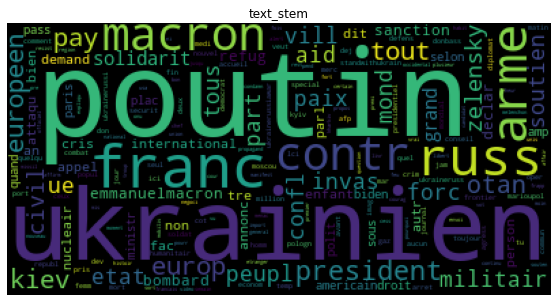

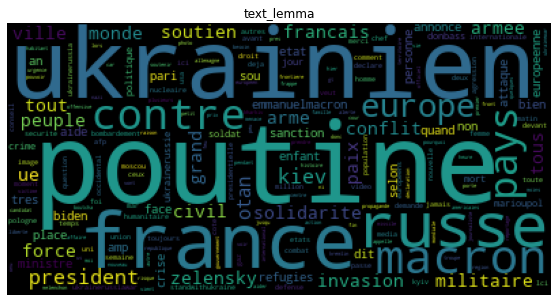

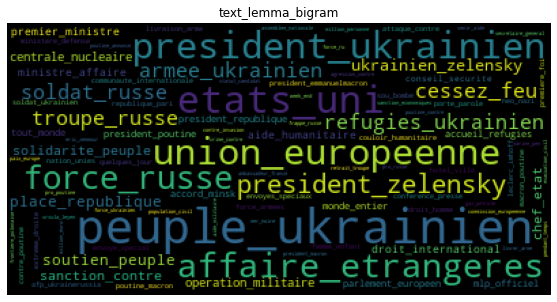

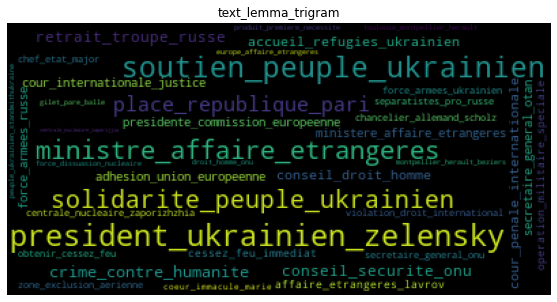

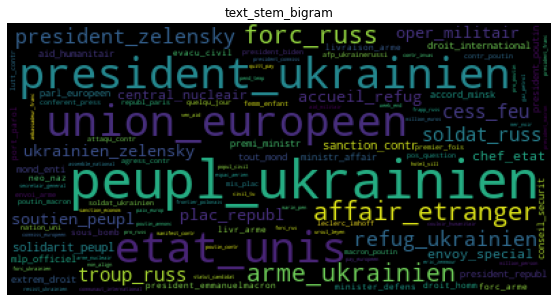

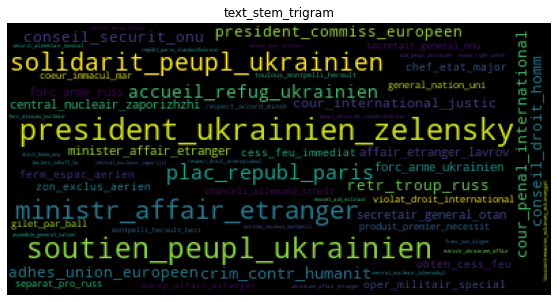

In [24]:
new_cols_prepro = ["text_stem", "text_lemma",
        "text_lemma_bigram", "text_lemma_trigram",
        "text_stem_bigram", "text_stem_trigram"]
for method in new_cols_prepro:
    words_t = ''
    for i in df_prepro[method]:
        try:
            words_t += '{} '.format(i.lower())
        except AttributeError:
            pass
    wd = pd.DataFrame(Counter(words_t.split()).most_common(), columns=['word', 'frequency_total'])
    tuples = [tuple(x) for x in wd.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.subplots(figsize=(10, 5)) 
    plt.imshow(wordcloud)
    plt.title(f"{method}") 
    plt.axis("off")
    plt.show()

### Fréquence des ngrames

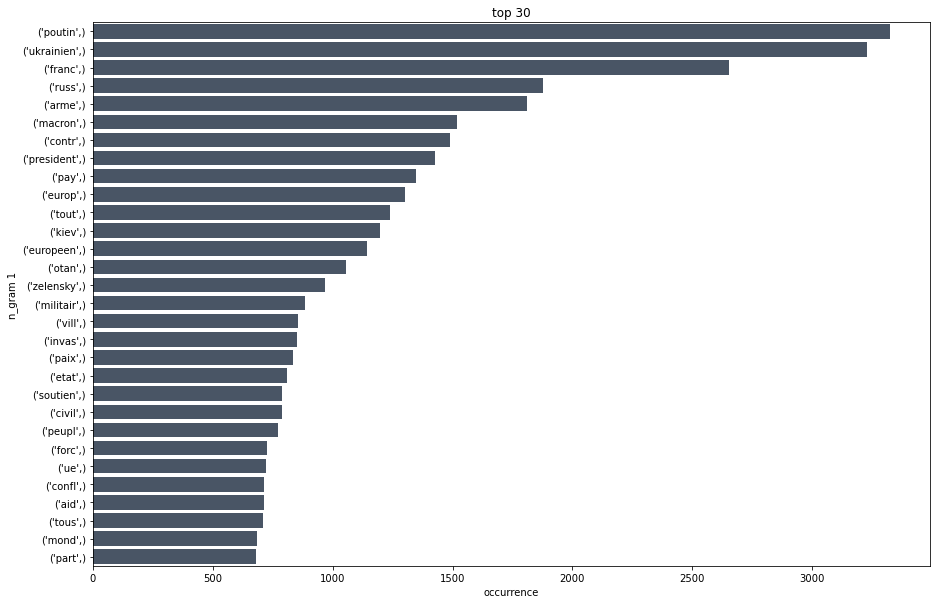

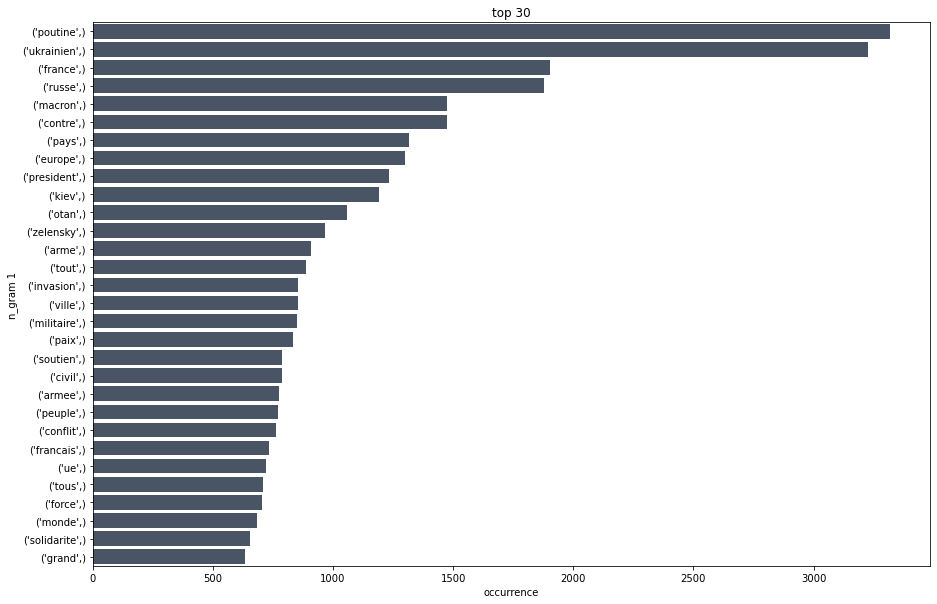

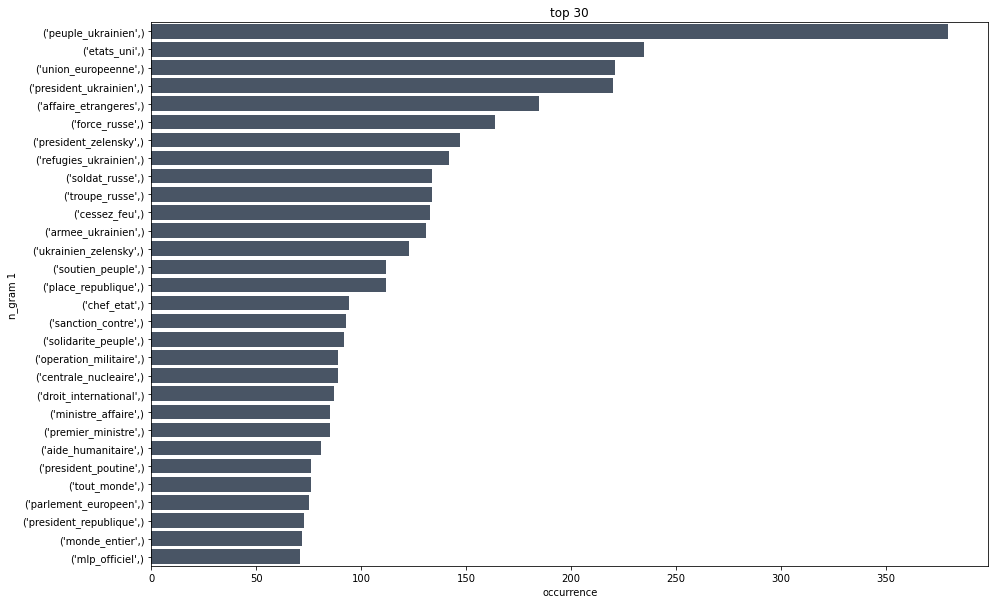

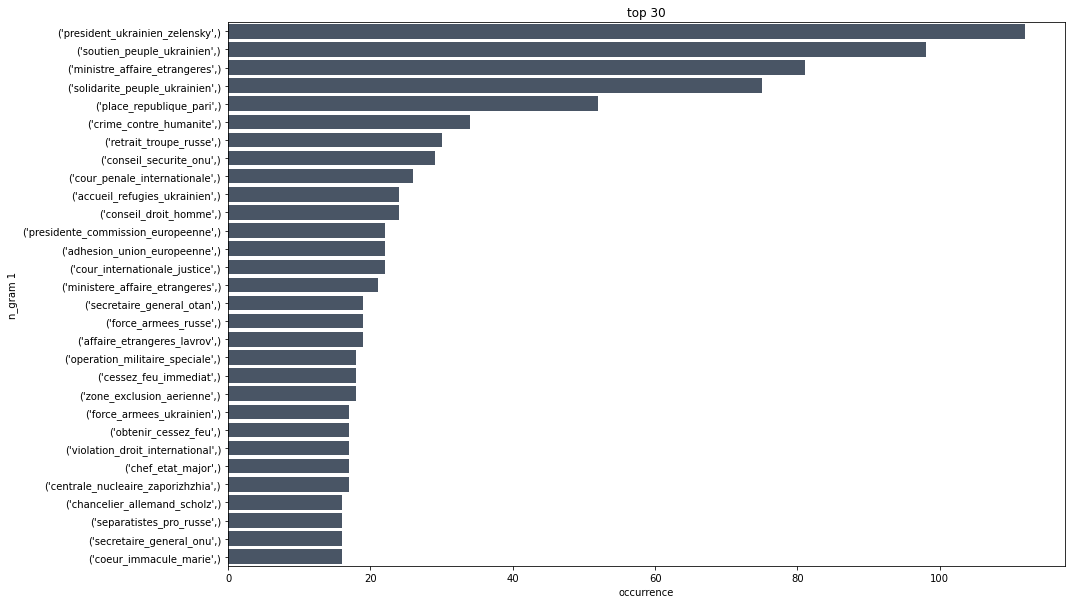

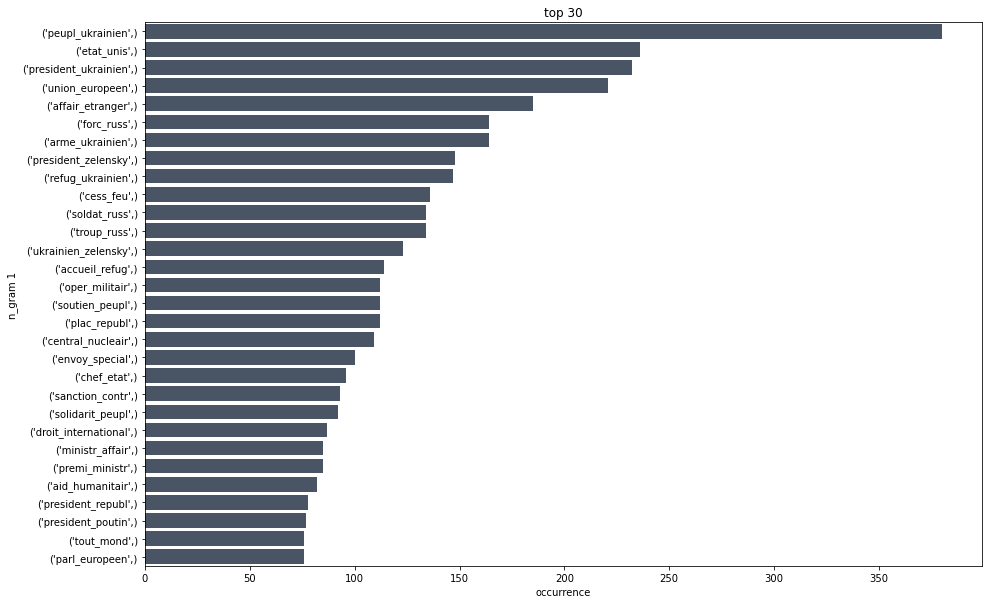

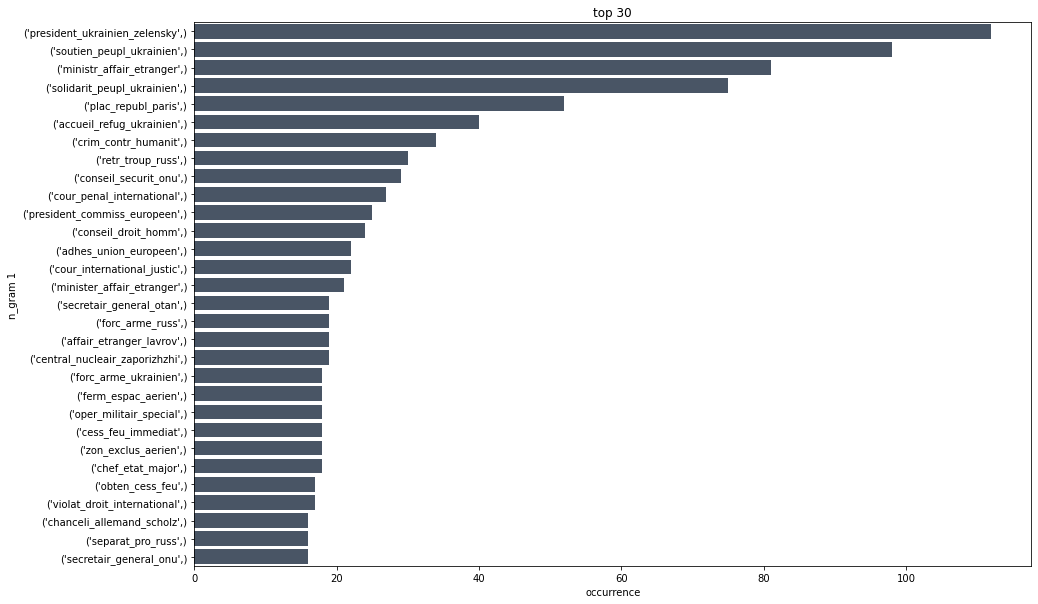

In [27]:
for col in new_cols_prepro:
    tokens = ' '.join(df_prepro[col]).split()
    ngram_top(tokens, n_gram = 1, n_top = 30)

## <span style="color:#191970">4. Vectorisation</span>

### <span style="color:#191970">4.1. CountVectorizer</span>

In [6]:
# Création du vectoriseur 
vectorizer = CountVectorizer(min_df=4) #limiter la taille du vocabulaire avec le paramètre min_df : prend les mots qui sortent au moins 4 fois

# Vectorisation de nos documents
X = vectorizer.fit_transform(df_prepro['text_clean'])
vect_array = X.toarray()
print(vect_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
print(f"Liste des features retenus : \n{vectorizer.get_feature_names_out()}")

Liste des features retenus : 
['abaisser' 'abandon' 'abandonne' ... 'zoom' 'zourabichvili' 'zozz']


In [8]:
##vocabulaire automatiquement constitué par Scikit-Learn (récupéré via vocabulary):
print (f"Taille: {len (vectorizer.vocabulary_)}")

Taille: 9316


In [9]:
df_cv = pd.DataFrame(data=vect_array,columns = vectorizer.get_feature_names_out())
print (df_cv)

       abaisser  abandon  abandonne  abandonnee  abandonner  abandonnes  \
0             0        0          0           0           0           0   
1             0        0          0           0           0           0   
2             0        0          0           0           0           0   
3             0        0          0           0           0           0   
4             0        0          0           0           0           0   
...         ...      ...        ...         ...         ...         ...   
19521         0        0          0           0           0           0   
19522         0        0          0           0           0           0   
19523         0        0          0           0           0           0   
19524         0        0          0           0           0           0   
19525         0        0          0           0           0           0   

       abarluet  abat  abattre  abattu  ...  zemmoureric  zemmourpresident  \
0             0     0

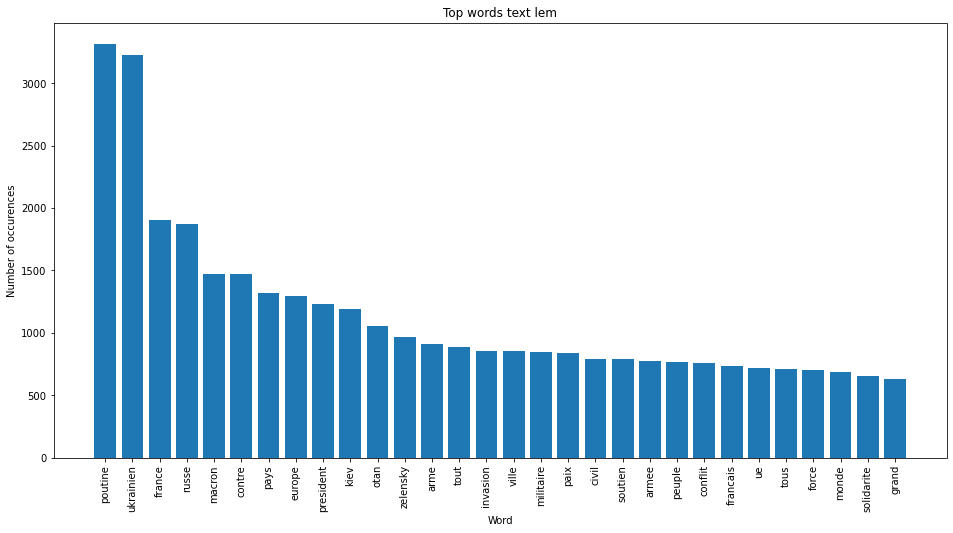

In [10]:
words, word_values = get_top_n_words(n_top_words=30,
                                     count_vectorizer=vectorizer,
                                     text_data=df_prepro["text_lemma"])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words text lem');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

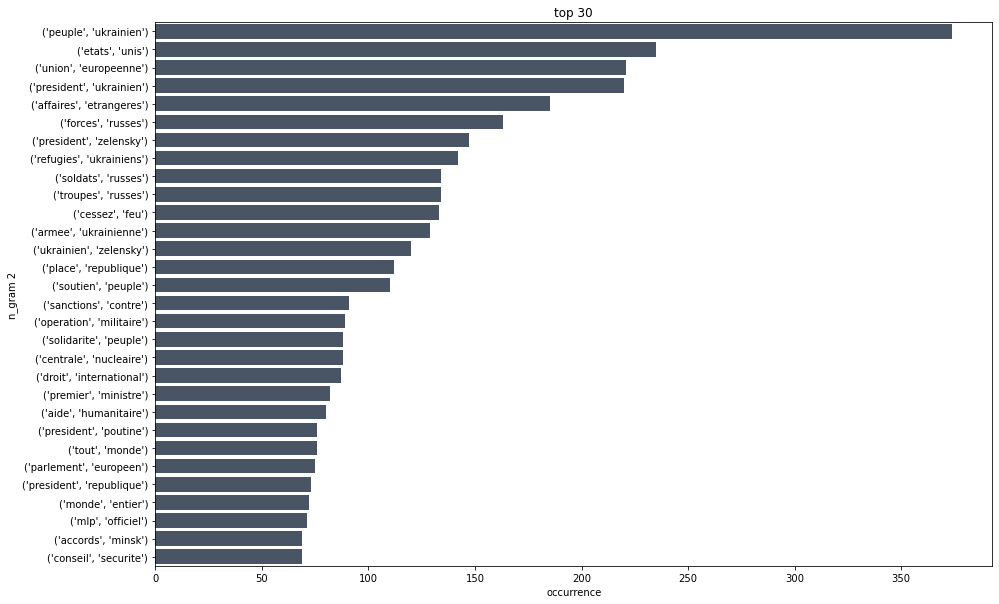

### <span style="color:#191970">4.2. tfidf</span>

In [13]:
get_tfidf_top_features(df_prepro["text_lemma"], n_top = 30)

C:\Users\vnarv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['poutine', 'ukrainien', 'france', 'russe', 'macron', 'contre',
       'europe', 'pays', 'kiev', 'president', 'otan', 'zelensky',
       'invasion', 'arme', 'paix', 'tout', 'militaire', 'ville',
       'soutien', 'armee', 'conflit', 'civil', 'peuple', 'francais', 'ue',
       'solidarite', 'tous', 'monde', 'force', 'grand'], dtype='<U16')

### <span style="color:#191970">4.3. LDA</span>

In [ ]:
run_all(data.copy(deep=True), "text_lemma", "lemma", True)

In [ ]:
run_all(data.copy(deep=True), "text_lemma", "lemma", False, 3)

In [ ]:
df_lemma_2topics = pd.read_csv(path + "output/dominant_topics_lemma_2topics.csv", sep=";")
filter_columns = ["text", "username", "text_lemma", "dominant_topic",
                 "topic_perc_contrib", "keywords"]

In [ ]:
df_lemma_2topics = df_lemma_2topics[filter_columns]
for i in df_lemma_2topics["dominant_topic"].unique():
    display(df_lemma_2topics[
        df_lemma_2topics["dominant_topic"]==i
    ].sort_values(by=["dominant_topic",
                      "topic_perc_contrib"], ascending=[True, False]).head(20))

In [ ]:
df_lemma_3topics = pd.read_csv(path + "output/dominant_topics_lemma_3topics.csv", sep=";")
for i in df_lemma_3topics["dominant_topic"].unique():
    display(df_lemma_3topics[df_lemma_3topics[
        "dominant_topic"]==i
                            ].sort_values(by=["dominant_topic",
                                              "topic_perc_contrib"], ascending=[True, False]).head(20))

### Autres modèles

In [ ]:
run_all(data.copy(deep=True), "text_stem", "stem", True)
run_all(data.copy(deep=True), "text_stem", "stem", False, 2)
run_all(data.copy(deep=True), "text_stem", "stem", False, 4)
run_all(data.copy(deep=True), "text_lemma_bigram", "lemma_bigram", True)
run_all(data.copy(deep=True), "text_lemma_bigram", "lemma_bigram", False, 3)
run_all(data.copy(deep=True), "text_lemma_bigram", "lemma_bigram", False, 4)
run_all(data.copy(deep=True), "text_stem_bigram", "stem_bigram", True)
run_all(data.copy(deep=True), "text_stem_bigram", "stem_bigram", False, 2)
run_all(data.copy(deep=True), "text_stem_bigram", "stem_bigram", False, 5)
run_all(data.copy(deep=True), "text_lemma_trigram", "lemma_trigram", True)
run_all(data.copy(deep=True), "text_lemma_trigram", "lemma_trigram", False, 3)
run_all(data.copy(deep=True), "text_stem_trigram", "stem_trigram", True)
run_all(data.copy(deep=True), "text_stem_trigram", "stem_trigram", False, 3)
run_all(data.copy(deep=True), "text_stem_trigram", "stem_trigram", False, 4)